<br><br>
El presente notebook tiene por finalidad aprender a extraer datos de una pagina web, en este caso y a modo de ejemplo, de la loteria "La Tinka". Con la realización de un pequeño analisis descriptivo para entender la ocurrencia de cada valor.
<br><br>

In [1]:
# librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [32]:
# Leer datos desde internet de la tinka

######################################################################
# Truco para leer datos sin SSL - sin verificacion
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
######################################################################

# Leer datos de tabla segun pagina web de la Tinka
tabla = pd.read_html('https://resultados.intralot.com.pe/i.do?m=historico')

# Adaptar nombres y elementos de tabla
nombres = tabla[0].copy()
tabla = tabla[1]
tabla.columns = nombres.columns
tabla =  tabla.rename(columns={"Unnamed: 3":"Yapa"})
del nombres

# crear nuevas columnas "b_i" y "o_i"
columnas_nuevas = ["b" + str(ii) for ii in range(1,6+1)]
columnas_nuevas.extend(["o" + str(ii) for ii in range(1,6+1)])
tabla.loc[:,columnas_nuevas] = [0]*12
tabla.loc[:,columnas_nuevas] = tabla.loc[:,columnas_nuevas].astype('int8',copy=False)

######################

# Crear columnas "b1" a "b6"
tabla.loc[:,"b1":"b6"] = tabla['Bolillas'].str.split(" ").tolist()
tabla.loc[:,columnas_nuevas] = tabla.loc[:,columnas_nuevas].astype('int8',copy=False)
tabla.loc[:,"Fecha"] = pd.to_datetime(tabla.loc[:,"Fecha"],infer_datetime_format=True) 
######################

## generar las columnas o1,o2...o6
#### NOTA: por ejemplo si el resultado fue b1 ... b6 = 20,13,40,4,18,33
#### entonces sus valores ordenaos serian  o1 ... o6 = 4,13,18,20,33,40
for ii in range(tabla.shape[0]):
    datitos = tabla.loc[ii,"b1":"b6"].copy().tolist()
    datitos = np.sort(datitos).tolist()
    tabla.loc[ii,"o1":"o6"] = datitos
    del datitos

# tabla auxiliar
tabla_aux = tabla.copy()
######################
tabla # ver df

,Fecha,Sorteo,Bolillas,Yapa,Adicionales,Sorteo Extra,b1,b2,b3,b4,b5,b6,o1,o2,o3,o4,o5,o6
0,2022-06-03,861,12 44 03 41 14 22,21.0,05 28,Promoción Sí o Sí,12,44,3,41,14,22,3,12,14,22,41,44
1,2022-02-03,860,19 20 13 37 08 02,36.0,33 43,Promoción Sí o Sí,19,20,13,37,8,2,2,8,13,19,20,37
2,2022-02-27,859,23 45 11 30 21 10,4.0,36 20 38,Promoción Sí o Sí,23,45,11,30,21,10,10,11,21,23,30,45
3,2022-02-23,858,13 35 19 01 21 08,10.0,45 44 16,Promoción Sí o Sí,13,35,19,1,21,8,1,8,13,19,21,35
4,2022-02-20,857,28 24 46 05 11 38,2.0,17 19 21 44,Promoción Sí o Sí,28,24,46,5,11,38,5,11,24,28,38,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,1994-11-13,5,04 10 13 14 18 24,NaN,NaN,NaN,4,10,13,14,18,24,4,10,13,14,18,24
2139,1994-06-11,4,07 11 12 19 29 31,NaN,NaN,NaN,7,11,12,19,29,31,7,11,12,19,29,31
2140,1994-10-30,3,12 13 16 18 31 32,NaN,NaN,NaN,12,13,16,18,31,32,12,13,16,18,31,32
2141,1994-10-23,2,10 14 18 20 24 34,NaN,NaN,NaN,10,14,18,20,24,34,10,14,18,20,24,34


------

Seleccion de datos en rango de fechas

In [33]:
# Aplicar algun filtrado segun fecha o rango en especifico --- Tomamos 10 años de rango

# fecha inicio y fin ... formato: "año-mes-dia"
fecha_inicio = "2013-01-01"
fecha_fin    = "2023-01-01"
print('\nFecha inicio: ',fecha_inicio," ; Fecha fin: ",fecha_fin,'\n')

# restaurar valores originales
tabla = tabla_aux.copy()

# aplicar filtrado de fechas
tabla = tabla[(tabla["Fecha"] >= fecha_inicio) & (tabla["Fecha"] <= fecha_fin)].copy()
print('\nCantidad de Tinkas jugadas: ',tabla.shape[0],'\n')
tabla # ver df


Fecha inicio:  2013-01-01  ; Fecha fin:  2023-01-01 


Cantidad de Tinkas jugadas:  845 



,Fecha,Sorteo,Bolillas,Yapa,Adicionales,Sorteo Extra,b1,b2,b3,b4,b5,b6,o1,o2,o3,o4,o5,o6
0,2022-06-03,861,12 44 03 41 14 22,21.0,05 28,Promoción Sí o Sí,12,44,3,41,14,22,3,12,14,22,41,44
1,2022-02-03,860,19 20 13 37 08 02,36.0,33 43,Promoción Sí o Sí,19,20,13,37,8,2,2,8,13,19,20,37
2,2022-02-27,859,23 45 11 30 21 10,4.0,36 20 38,Promoción Sí o Sí,23,45,11,30,21,10,10,11,21,23,30,45
3,2022-02-23,858,13 35 19 01 21 08,10.0,45 44 16,Promoción Sí o Sí,13,35,19,1,21,8,1,8,13,19,21,35
4,2022-02-20,857,28 24 46 05 11 38,2.0,17 19 21 44,Promoción Sí o Sí,28,24,46,5,11,38,5,11,24,28,38,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,2013-10-23,21,26 28 33 39 43 44,3.0,NaN,NaN,26,28,33,39,43,44,26,28,33,39,43,44
841,2013-10-20,20,14 15 18 31 41 43,27.0,NaN,NaN,14,15,18,31,41,43,14,15,18,31,41,43
842,2013-10-16,19,01 16 32 34 40 45,44.0,NaN,NaN,1,16,32,34,40,45,1,16,32,34,40,45
843,2013-10-13,18,01 20 21 22 32 35,29.0,NaN,NaN,1,20,21,22,32,35,1,20,21,22,32,35


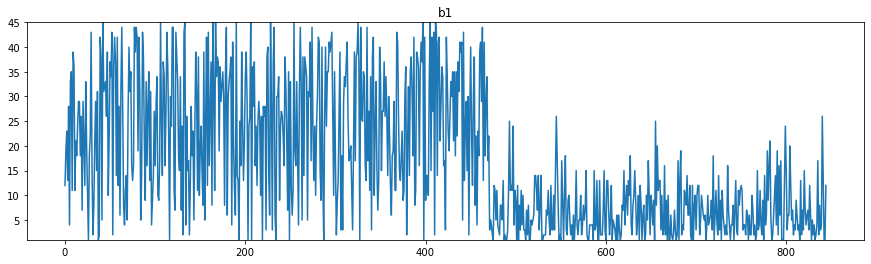

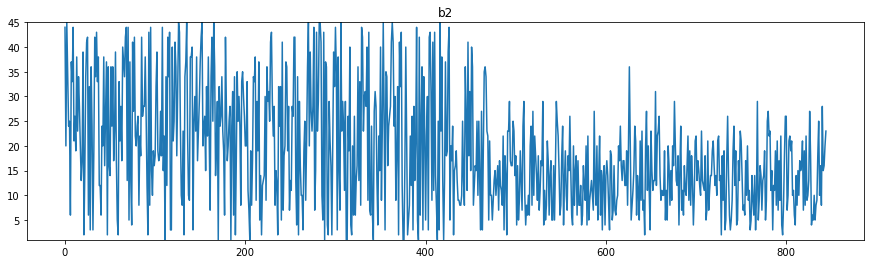

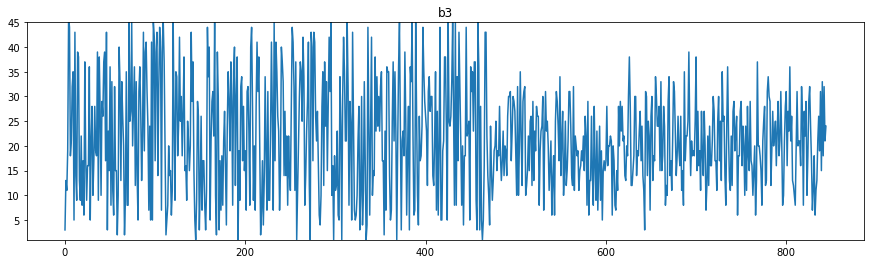

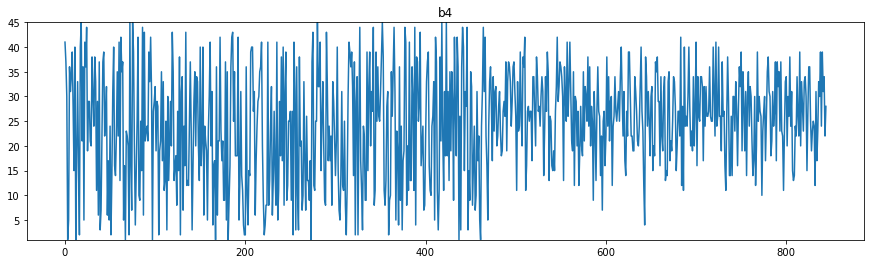

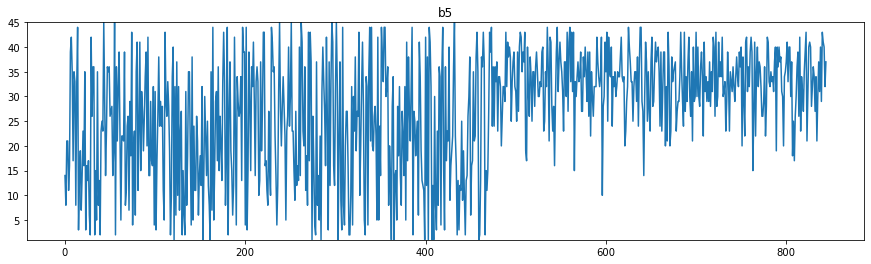

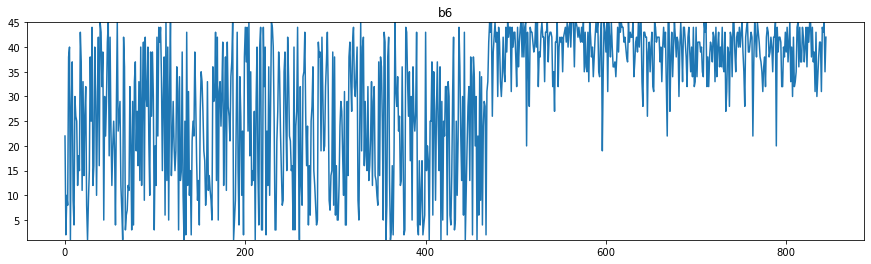

In [34]:
# ver los valores valores originales b1,b2,...,b6

columnas = ["b" + str(ii) for ii in range(1,6+1)]
for col in columnas:
    plt.figure(figsize=(15,4))
    plt.plot(tabla[col][::-1]) # invertir order de resultados
    plt.title(col)
    plt.ylim([1,45])
    plt.show()

# fin

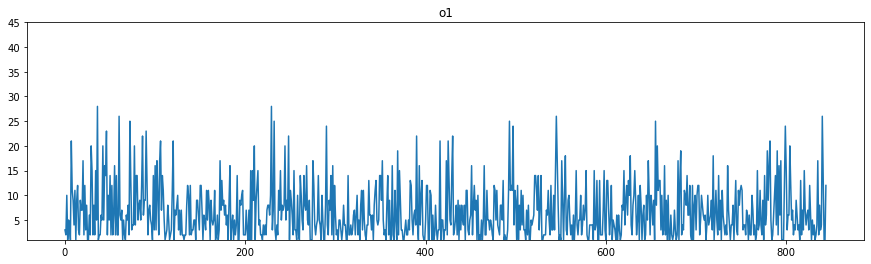

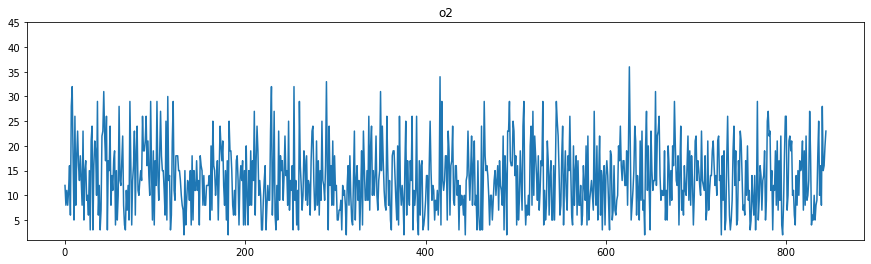

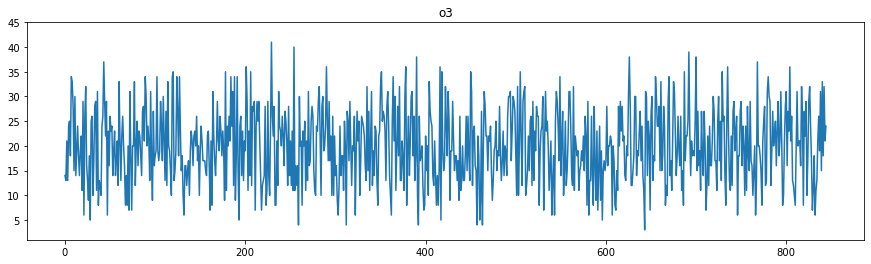

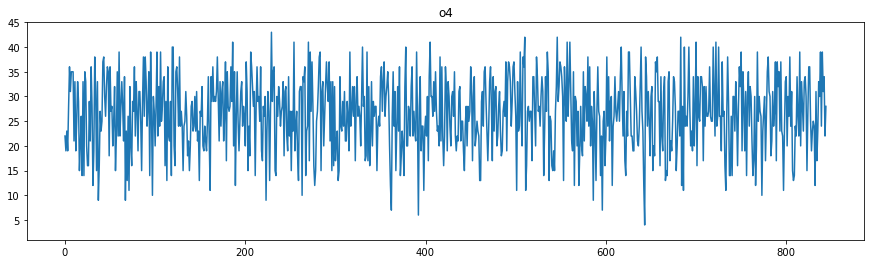

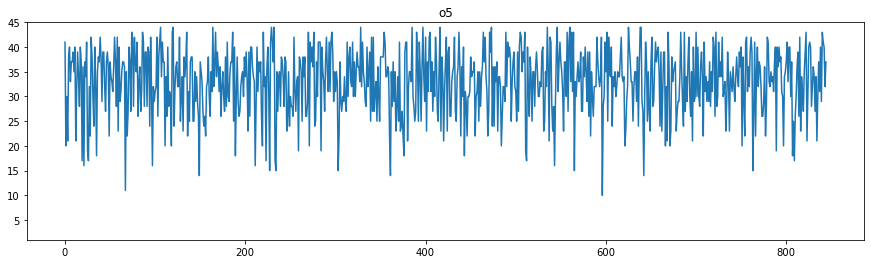

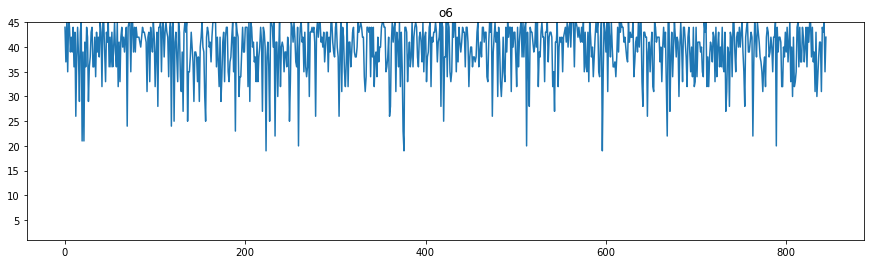

In [35]:
# ver los valores valores ordenados o1,o2,...,o6

columnas = ["o" + str(ii) for ii in range(1,6+1)]
for col in columnas:
    plt.figure(figsize=(15,4))
    plt.plot(tabla[col][::-1]) # invertir order de resultados
    plt.title(col)
    plt.ylim([1,45])
    plt.show()

# fin

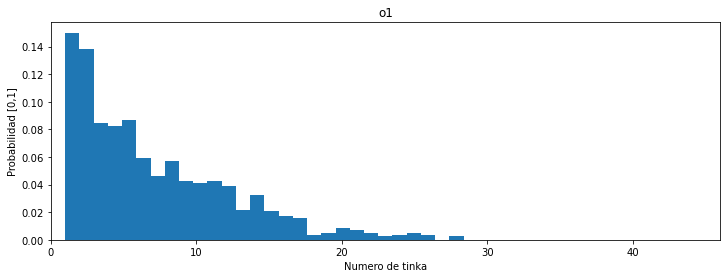

         prob  numero  prob_total
0   15.008069       1       15.01
1   13.797741       2       28.81
4    8.714363       5       37.52
2    8.472297       3       45.99
3    8.230231       4       54.22
5    5.930608       6       60.15
7    5.688542       8       65.84
6    4.599247       7       70.44
8    4.236148       9       74.68
10   4.236148      11       78.91
9    4.115116      10       83.03
------------------------------------------------




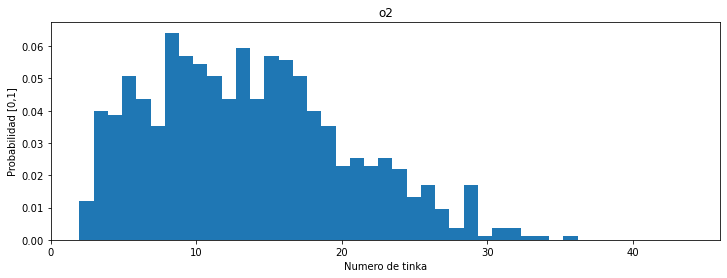

        prob  numero  prob_total
7   6.414739       8        6.41
12  5.930608      13       12.35
8   5.688542       9       18.03
14  5.688542      15       23.72
15  5.567509      16       29.29
9   5.446477      10       34.74
16  5.083378      17       39.82
4   5.083378       5       44.90
10  5.083378      11       49.99
5   4.357181       6       54.34
11  4.357181      12       58.70
13  4.357181      14       63.06
2   3.994083       3       67.05
17  3.994083      18       71.05
3   3.873050       4       74.92
6   3.509952       7       78.43
18  3.509952      19       81.94
22  2.541689      23       84.48
------------------------------------------------




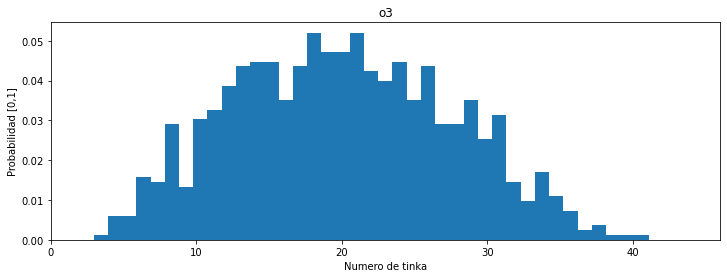

        prob  numero  prob_total
20  5.204411      21        5.20
17  5.204411      18       10.41
19  4.720280      20       15.13
18  4.720280      19       19.85
23  4.478214      23       24.33
14  4.478214      15       28.81
13  4.478214      14       33.28
16  4.357181      17       37.64
12  4.357181      13       42.00
25  4.357181      25       46.36
21  4.236148      22       50.59
22  3.994083      23       54.59
11  3.873050      12       58.46
24  3.509952      24       61.97
28  3.509952      28       65.48
15  3.509952      16       68.99
10  3.267886      11       72.26
30  3.146853      30       75.40
9   3.025820      10       78.43
27  2.904788      27       81.33
26  2.904788      26       84.24
------------------------------------------------




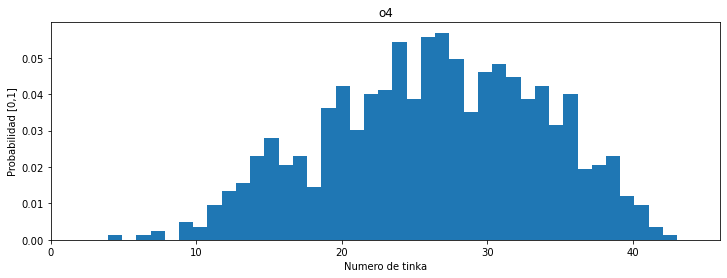

        prob  numero  prob_total
26  5.688542      26        5.69
25  5.567509      25       11.26
23  5.446477      23       16.70
27  4.962345      27       21.66
30  4.841313      30       26.51
29  4.599247      29       31.11
31  4.478214      31       35.58
33  4.236148      33       39.82
19  4.236148      20       44.06
22  4.115116      23       48.17
35  3.994083      35       52.17
21  3.994083      22       56.16
32  3.873050      32       60.03
24  3.873050      24       63.91
18  3.630984      19       67.54
28  3.509952      28       71.05
34  3.146853      34       74.19
20  3.025820      21       77.22
14  2.783755      15       80.00
16  2.299623      17       82.30
13  2.299623      14       84.60
------------------------------------------------




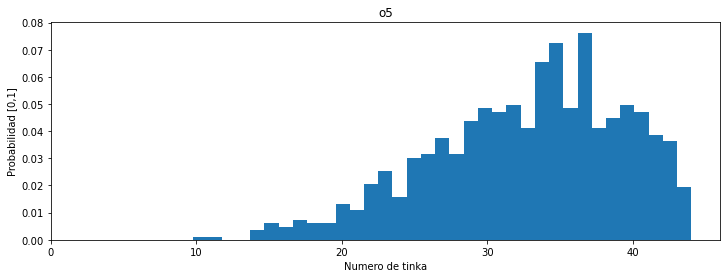

        prob  numero  prob_total
36  7.625067      36        7.63
34  7.261969      34       14.89
33  6.535772      33       21.42
39  4.962345      39       26.39
31  4.962345      31       31.35
35  4.841313      35       36.19
29  4.841313      29       41.03
30  4.720280      30       45.75
40  4.720280      40       50.47
38  4.478214      38       54.95
28  4.357181      28       59.31
32  4.115116      32       63.42
37  4.115116      37       67.54
41  3.873050      41       71.41
26  3.752017      26       75.16
42  3.630984      42       78.79
27  3.146853      27       81.94
------------------------------------------------




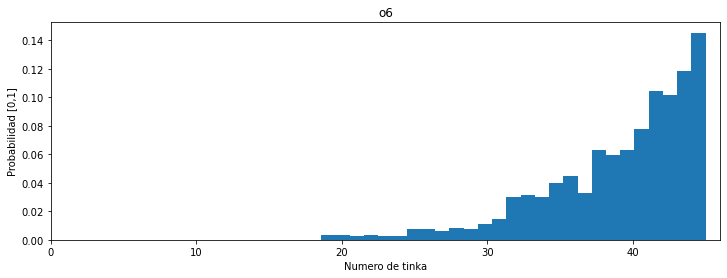

         prob  numero  prob_total
44  14.541146      44       14.54
43  11.875269      43       26.42
41  10.421155      41       36.84
42  10.178802      42       47.02
40   7.755278      40       54.77
39   6.301163      39       61.07
37   6.301163      37       67.37
38   5.937635      38       73.31
35   4.483520      35       77.80
34   3.998815      34       81.79
------------------------------------------------




In [36]:
# ver distribucion de valores segun bolita ... analizar las probabilidades de aparecer de cada valor

columnas = ["o" + str(ii) for ii in range(1,6+1)]
for col in columnas:
    plt.figure(figsize=(12,4))
    datosx = plt.hist(tabla[col],range=(1,45),bins=45,density=True)
    plt.title(col)
    plt.xlim([0,46])
    plt.xlabel('Numero de tinka')
    plt.ylabel('Probabilidad [0,1]')
    plt.show()
    
    # Calculo de valores acumulados de probabilidad
    dax = pd.DataFrame({'prob':datosx[0],'numero':datosx[1][:-1]})
    dax["prob"] = dax["prob"]*100.0
    dax['numero'] = np.round(dax['numero'],0)
    dax["numero"] = dax["numero"].astype('int8') 
    dax = dax.sort_values('prob',ascending=False)
    dax['prob_total'] = dax['prob'].cumsum()
    dax['prob_total'] = np.round(dax['prob_total'],2)
    # solo imprimir las primeras filas 
    cum_max = 85.0  # probabilidad acumulada
    print(dax[dax['prob_total'] < cum_max])
    print('------------------------------------------------\n\n')

# fin

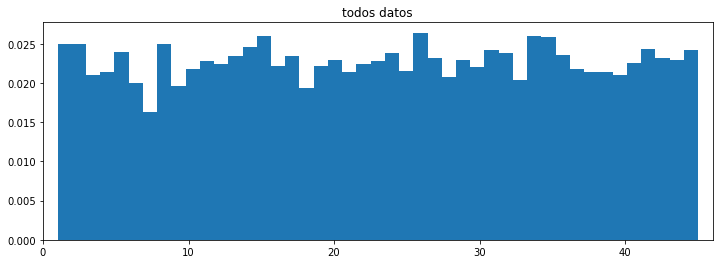

        prob  numero  prob_total
25  2.643071      25        2.64
33  2.602719      33        5.25
14  2.602719      15        7.85
34  2.582543      34       10.43
0   2.501838       1       12.93
1   2.501838       2       15.43
7   2.501838       8       17.94
13  2.461486      14       20.40
41  2.441310      41       22.84
30  2.421134      30       25.26
44  2.421134      44       27.68
4   2.400958       5       30.08
23  2.380782      23       32.46
31  2.380782      31       34.84
35  2.360605      35       37.20
16  2.340429      17       39.55
12  2.340429      13       41.89
26  2.320253      26       44.21
42  2.320253      42       46.53
43  2.300077      43       48.83
28  2.300077      28       51.13
19  2.300077      20       53.43
22  2.279901      23       55.71
10  2.279901      11       57.99
40  2.259725      40       60.25
11  2.239549      12       62.49
21  2.239549      22       64.72
18  2.219373      19       66.94
15  2.219373      16       69.16
29  2.1991

In [37]:
# Ver probabilidades de TODOS los numeros obtenidos

columnas = ["o" + str(ii) for ii in range(1,6+1)]
total = []
for col in columnas:
    if(len(total) == 0):
        total = tabla[col].tolist()
    else:
        total.extend(tabla[col].tolist())

total = pd.DataFrame({'datos':total})
plt.figure(figsize=(12,4))
datosx = plt.hist(total['datos'],range=(1,45),bins=45,density=True)
plt.title('todos datos')
plt.xlim([0,46])
plt.show()

# Calculo de valores acumulados de probabilidad
dax = pd.DataFrame({'prob':datosx[0],'numero':datosx[1][:-1]})
dax["prob"] = dax["prob"]*100.0
dax['numero'] = np.round(dax['numero'],0)
dax["numero"] = dax["numero"].astype('int8') 
dax = dax.sort_values('prob',ascending=False)
dax['prob_total'] = dax['prob'].cumsum()
dax['prob_total'] = np.round(dax['prob_total'],2)
# solo imprimir las primeras filas 
cum_max = 85.0  # probabilidad acumulada
print(dax[dax['prob_total'] < cum_max])

# fin

<b>Observación & Conclusión</b>: Como puede verse en ese ultimo histograma y los valores de la tabla de probabilidades, se puede ver que practicamente cada uno de los valores posee la misma probabilidad de aparecer en un juego jugado, por lo que a priori, se puede decir que no existe una preferencia substancial sobre algun valor de bola respecto a otro.

---------

Calcular las diferencias en los valores de las bolitas
<br><br>
Notas:
<br>
La primera diferencia de o1[n] es o1_1[n] = o1[n] - o1[n-1]
<br>
La segunda diferencia es o1[n] es o1_2[n] = o1_1[n] - o1_1[n-1]
<br>
Y asi ....

In [38]:
# Calculo de diferencias en los valores de los valores de "o1"

tabla_aux = tabla.loc[:,["Fecha","o1"]].copy()
tabla_aux["o1_1"] = tabla_aux["o1"].copy().shift(-1) - tabla_aux["o1"].copy()
tabla_aux["o1_2"] = tabla_aux["o1_1"].copy().shift(-1) - tabla_aux["o1_1"].copy()
tabla_aux["o1_3"] = tabla_aux["o1_2"].copy().shift(-1) - tabla_aux["o1_2"].copy()
tabla_aux["o1_4"] = tabla_aux["o1_3"].copy().shift(-1) - tabla_aux["o1_3"].copy()
tabla_aux["o1_5"] = tabla_aux["o1_4"].copy().shift(-1) - tabla_aux["o1_4"].copy()
tabla_aux["o1_6"] = tabla_aux["o1_5"].copy().shift(-1) - tabla_aux["o1_5"].copy()
tabla_aux["o1_7"] = tabla_aux["o1_6"].copy().shift(-1) - tabla_aux["o1_6"].copy()
tabla_aux["o1_8"] = tabla_aux["o1_7"].copy().shift(-1) - tabla_aux["o1_7"].copy()
tabla_aux["o1_9"] = tabla_aux["o1_8"].copy().shift(-1) - tabla_aux["o1_8"].copy()
tabla_aux["o1_10"] = tabla_aux["o1_9"].copy().shift(-1) - tabla_aux["o1_9"].copy()
tabla_aux = tabla_aux.dropna()
tabla_aux

,Fecha,o1,o1_1,o1_2,o1_3,o1_4,o1_5,o1_6,o1_7,o1_8,o1_9,o1_10
0,2022-06-03,3,-1.0,9.0,-26.0,56.0,-104.0,173.0,-241.0,208.0,195.0,-1546.0
1,2022-02-03,2,8.0,-17.0,30.0,-48.0,69.0,-68.0,-33.0,403.0,-1351.0,3401.0
2,2022-02-27,10,-9.0,13.0,-18.0,21.0,1.0,-101.0,370.0,-948.0,2050.0,-4036.0
3,2022-02-23,1,4.0,-5.0,3.0,22.0,-100.0,269.0,-578.0,1102.0,-1986.0,3553.0
4,2022-02-20,5,-1.0,-2.0,25.0,-78.0,169.0,-309.0,524.0,-884.0,1567.0,-2981.0
...,...,...,...,...,...,...,...,...,...,...,...,...
830,2013-11-27,2,2.0,-5.0,9.0,-12.0,25.0,-87.0,286.0,-791.0,1901.0,-4096.0
831,2013-11-24,4,-3.0,4.0,-3.0,13.0,-62.0,199.0,-505.0,1110.0,-2195.0,3924.0
832,2013-11-20,1,1.0,1.0,10.0,-49.0,137.0,-306.0,605.0,-1085.0,1729.0,-2294.0
833,2013-11-17,2,2.0,11.0,-39.0,88.0,-169.0,299.0,-480.0,644.0,-565.0,-248.0


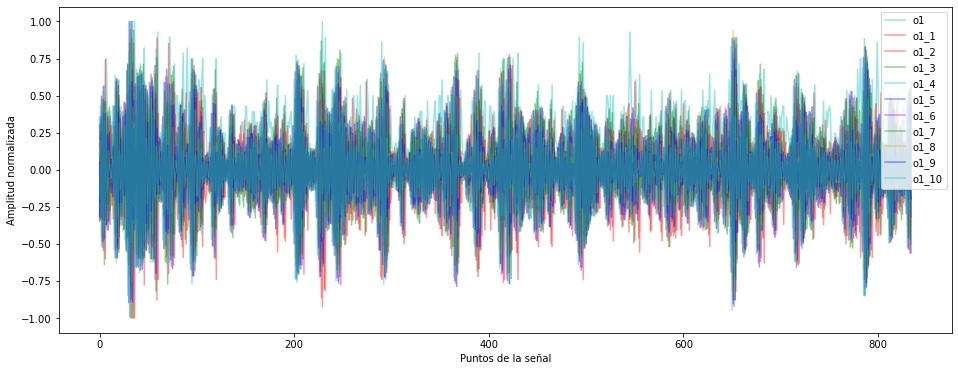

In [39]:
# graficar las secuencias en diferencias con normalizacion de amplitud

columnas = tabla_aux.loc[:,"o1":"o1_10"].columns.tolist()
colores = ['b','g','r','c','m','y','k']
plt.figure(figsize=(16,6))
for colu in columnas:
    # Graficar valores señales normalizadas
    ii = np.random.randint(0,len(colores))
    
    # obtener valor maximo de señal en valor absoluto
    maximo = np.nanmax(np.abs(tabla_aux[colu]))
    
    # grafica de señal
    sns.lineplot(x=range(tabla_aux.shape[0]),y=tabla_aux[colu]/maximo,color=colores[ii],alpha=0.4,label=colu)

# Titulo, ejes y leyenda
plt.legend(loc=1)
plt.xlabel('Puntos de la señal')
plt.ylabel('Amplitud normalizada')
plt.show()

# fin

In [42]:
# Escuchar el sonido de las muestras como si fuesen tratadas como señales de audio

# Importar librerias de audio
import sounddevice as sd
import time

# Frecuencia de muestreo de la señal de audio
fs = 1000

columnas = tabla_aux.loc[:,"o1":"o1_10"].columns.tolist()
for colu in columnas:
    # Normalización de la señal al rango [-1,1]
    maximo = np.nanmax(np.abs(tabla_aux[colu]))
    sonido = tabla_aux[colu]/maximo
    sd.play(sonido, fs) # reproducir el sonido
    time.sleep(2)
    print('fin de sonido: ',colu)

# fin

fin de sonido:  o1
fin de sonido:  o1_1
fin de sonido:  o1_2
fin de sonido:  o1_3
fin de sonido:  o1_4
fin de sonido:  o1_5
fin de sonido:  o1_6
fin de sonido:  o1_7
fin de sonido:  o1_8
fin de sonido:  o1_9
fin de sonido:  o1_10


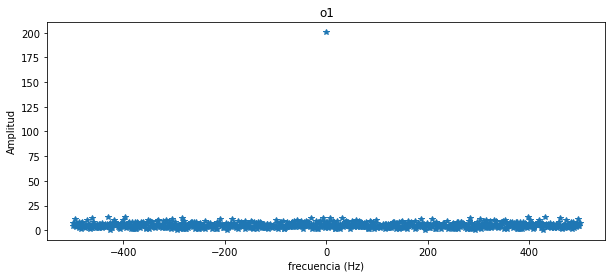

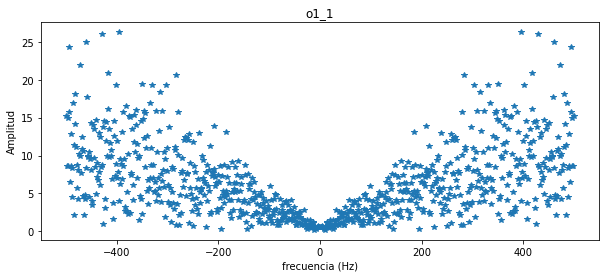

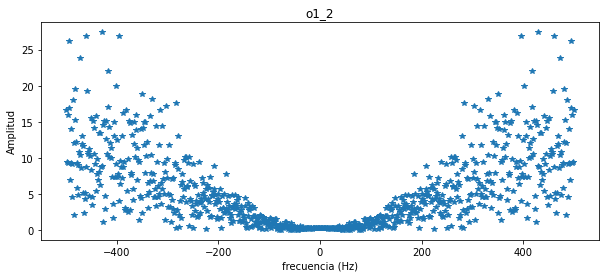

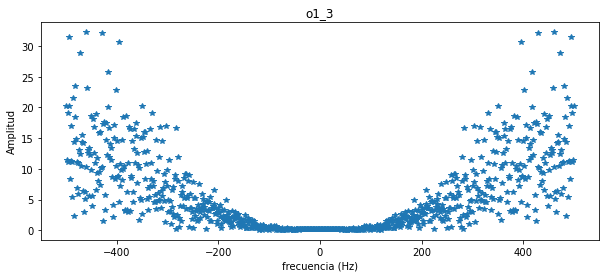

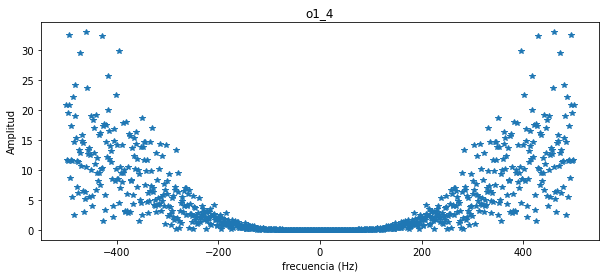

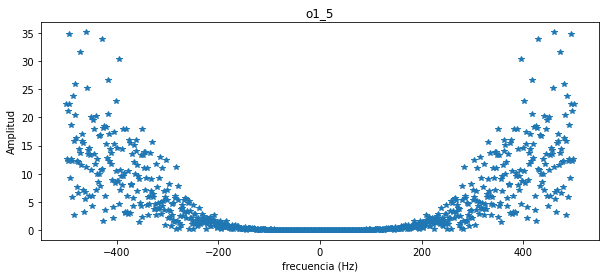

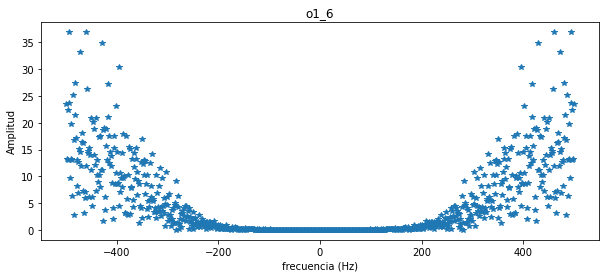

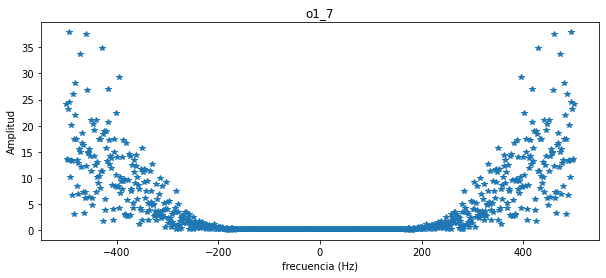

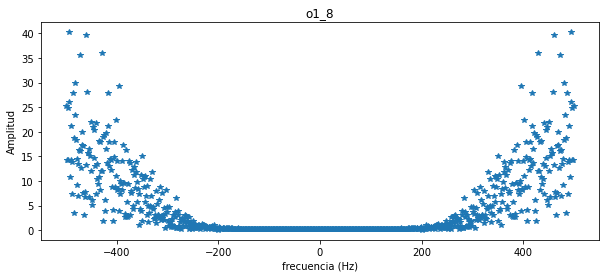

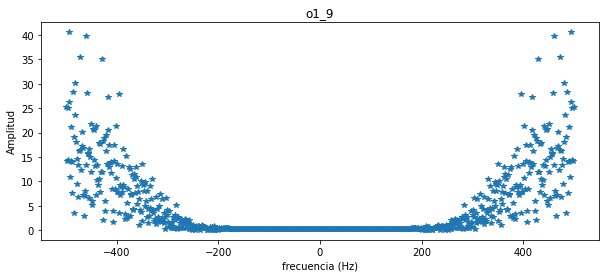

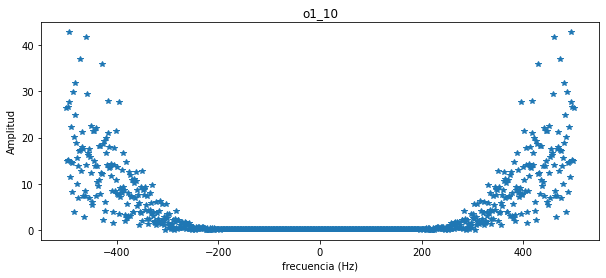

In [45]:
# Analisis en frecuencia de las señales en diferencias obtenidos

# importar librerias para transformada de Fourir
from scipy.fft import fft, fftfreq

# Frecuencia de muestreo de la señal de audio
fs = 1000
columnas = tabla_aux.loc[:,"o1":"o1_10"].columns.tolist()

# Calculo de Fourier y ploteo
for colu in columnas:
    plt.figure(figsize=(10,4))
    maximo = np.nanmax(np.abs(tabla_aux[colu]))
    sonido = np.array(tabla_aux[colu]/maximo)
    N = len(sonido)
    yf = fft(sonido)
    xf = fftfreq(N, 1/fs)
    plt.plot(xf, np.abs(yf),'*')
    plt.xlabel('frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title(colu)
    plt.show()

# fin

--------------
--------------
--------------